<a href="https://colab.research.google.com/github/ilsilfverskiold/transformers-nlp-docs/blob/main/cook/datasets/process_huggingface_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process Hugging Face Dataset
Process Hugging Face Dataset with missing validation set. Will load dataset from hugging face based on a path, then set up the validation set. After this, we'll check the dataset and filter out anything that's unnecessary.


In [ ]:
# install dependencies
!pip install datasets

In [ ]:
from datasets import load_dataset

# Import dataset from hugging face - (!) use the correct path
dataset = load_dataset("sunhaozhepy/ag_news_keywords_embeddings")
# Check the dataset
dataset

In [3]:
# Create a validate set (as it is missing in this dataset)
# Standard practice seems to be around 70-80% training, 10-20% validation and 10-20% testing but this is a larger dataset so we can keep the sets smaller
from datasets import DatasetDict

# Remember that the test and validation sets should be unique so we're grabbing data only from the training set to build the validation set
shuffled_training_set = dataset['train'].shuffle(seed=42)
validation_set = shuffled_training_set.select(range(7600))

new_training_set = shuffled_training_set.select(range(7600, len(shuffled_training_set)))

new_dataset = DatasetDict({
    'train': new_training_set,
    'validation': validation_set,
    'test': dataset['test']  # unchanged
})

new_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'keywords', 'keywords_embeddings'],
        num_rows: 112400
    })
    validation: Dataset({
        features: ['text', 'label', 'keywords', 'keywords_embeddings'],
        num_rows: 7600
    })
    test: Dataset({
        features: ['text', 'label', 'keywords', 'keywords_embeddings'],
        num_rows: 7600
    })
})

In [4]:
# function to map out some examples from the dataset
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Text: {example['text']}'")
        print(f"'>> Keywords: {example['keywords']}'")

# run function
show_samples(new_dataset)


'>> Text: Genes, Biology Important in Obesity Fight (AP) AP - Apart from upbringing and environment, scientists are discovering that genes and biology are more important in the fight against obesity than previously believed.'
'>> Keywords: Genes, Biology, Obesity'

'>> Text: Fear of disease leads to panic in storm-ravaged Haiti Survivors of the storm that ravaged Haiti face a new menace as contaminated water, putrefying bodies and devastated sanitary systems threaten an outbreak of waterborne diseases such as malaria and tetanus, aid workers warned yesterday.'
'>> Keywords: Fear, Disease, Haiti'

'>> Text: Langer fills out a strong team for the Ryder Cup Well, it #39;s not quite great, but it might be good enough to do the job. With the conclusion of the BMW International Open on Sunday came also the final reckoning in the constitution of the Europe Ryder Cup team.'
'>> Keywords: Ryder Cup team, BMW International Open, Europe'


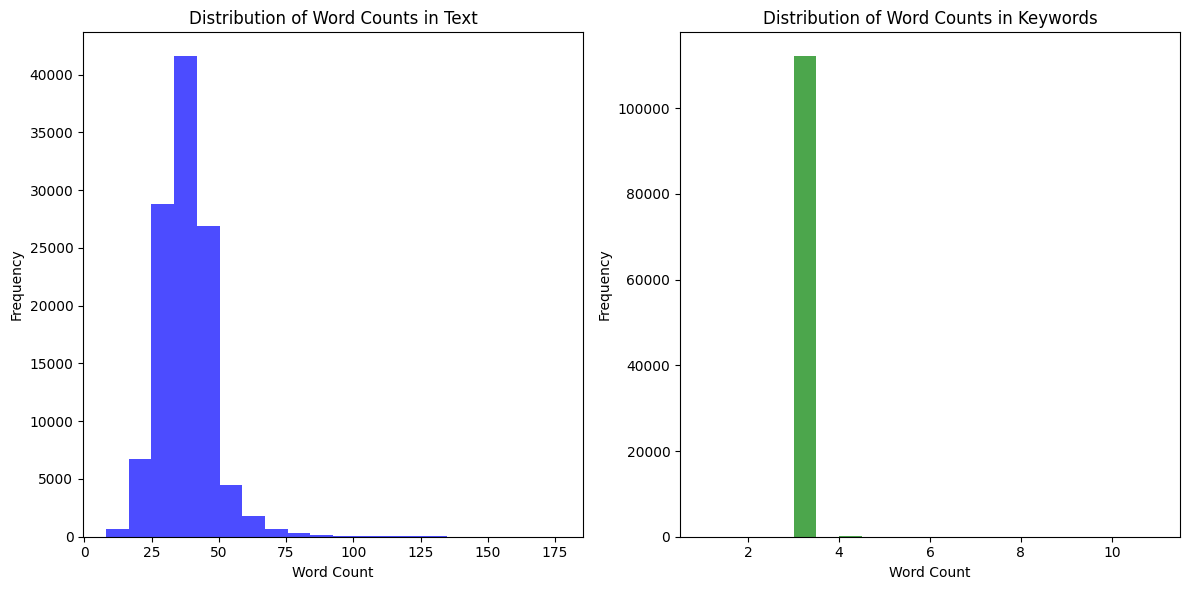

In [6]:
# (optional) map out the distribution of words - in case you'd like to filter out any outliers
import matplotlib.pyplot as plt

# Assuming new_dataset is your loaded dataset
text_word_counts = [len(example['text'].split()) for example in new_dataset['train']]
keywords_word_counts = [len(example['keywords'].split(',')) for example in new_dataset['train']]  # assuming keywords are comma-separated

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(text_word_counts, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Word Counts in Text')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(keywords_word_counts, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Word Counts in Keywords')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# from here you can either filter out any texts or continue to fine tune